# Importing Libraries

In [55]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime
from tensorflow.keras.datasets import cifar10
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset

In [56]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [57]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [58]:
len(classes)

10

# Normalizing the Images

In [59]:
X_train = X_train/255.0
X_test = X_test/255.0

In [60]:
X_train.shape
# 50000 -> no of images
# 32 * 32 -> pixels of images
# 3 -> RGB (colors)

(50000, 32, 32, 3)

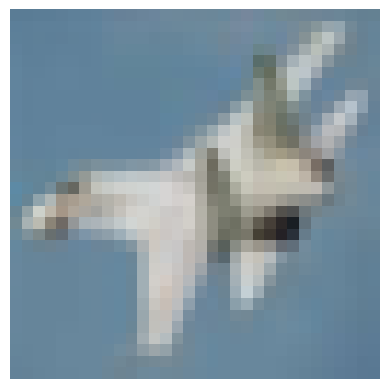

In [61]:
plt.imshow(X_test[10])
plt.axis("off");

# Builing a CNN

In [62]:
model = tf.keras.models.Sequential()

## Layer 1 (Conv2D)
 - filter = 32
 - kernel_size = 3
 - padding = 'same'
 - activation = 'relu'
 - input_shape = (32,32,3)


In [63]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',padding='same',input_shape=[32,32,3]))

## Layer 2 (Conv2D)
 - filters = 32 
 - kernel_size = 3
 - padding = same
 - activation = relu

In [64]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',padding='same'))

## Layer 3 (MaxPool)
 - pool_size = 2
 - strides = 2
 - padding = visit

In [65]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

## Layer 4 (Conv2D)
 - filters = 64
 - kernel_size = 3
 - padding = same
 - activation = relu  

In [66]:
model.add(tf.keras.layers.Conv2D(filters = 64,kernel_size = 3,padding = 'same',activation = 'relu'))

## Layer 5 (Conv2D)
 - filters = 64
 - kernel_size = 3
 - padding = same
 - activation = relu  

In [67]:
model.add(tf.keras.layers.Conv2D(filters = 64,kernel_size = 3,padding = 'same',activation = 'relu'))

## Layer 6 (MaxPool)
 - pool_size = 2
 - strides = 2
 - padding = visit

In [68]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

## Layer 7 (Flattening)

In [69]:
model.add(tf.keras.layers.Flatten())

## Layer 8 (Fully-Connected)

In [70]:
model.add(tf.keras.layers.Dense(units=128,activation='relu'))

## Layer 9 (Dropout)

In [71]:
model.add(tf.keras.layers.Dropout(0.3))

## Layer 10 (Fully-Connected)

In [72]:
model.add(tf.keras.layers.Dense(units=128,activation='relu'))

## Layer 12 (Output)
 - units = no of classes

In [73]:
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

## Compiling Model 

In [75]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_crossentropy','accuracy'])

# Training the CNN

In [76]:
earlyStopping = tf.keras.callbacks.EarlyStopping(patience=2,start_from_epoch=5)

In [77]:
model.fit(X_train,y_train,epochs=25,batch_size=200,validation_split=0.2,callbacks=[earlyStopping])

Epoch 1/25
200/200 [==============================] - 5s 13ms/step - loss: 1.7337 - sparse_categorical_crossentropy: 1.7337 - accuracy: 0.3545 - val_loss: 1.3819 - val_sparse_categorical_crossentropy: 1.3819 - val_accuracy: 0.4860
Epoch 2/25
200/200 [==============================] - 2s 10ms/step - loss: 1.3515 - sparse_categorical_crossentropy: 1.3515 - accuracy: 0.5063 - val_loss: 1.2445 - val_sparse_categorical_crossentropy: 1.2445 - val_accuracy: 0.5504
Epoch 3/25
200/200 [==============================] - 2s 9ms/step - loss: 1.1538 - sparse_categorical_crossentropy: 1.1538 - accuracy: 0.5859 - val_loss: 1.0186 - val_sparse_categorical_crossentropy: 1.0186 - val_accuracy: 0.6341
Epoch 4/25
200/200 [==============================] - 2s 10ms/step - loss: 1.0096 - sparse_categorical_crossentropy: 1.0096 - accuracy: 0.6435 - val_loss: 0.9254 - val_sparse_categorical_crossentropy: 0.9254 - val_accuracy: 0.6753
Epoch 5/25
200/200 [==============================] - 2s 10ms/step - loss: 0.

# Evaluating the CNN

In [78]:
evals = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7603 - sparse_categorical_crossentropy: 0.7603 - accuracy: 0.7466


In [79]:
print(evals,sep="\t")

[0.7603195309638977, 0.7603195309638977, 0.7465999722480774]
